In [1]:
import os, re
from pprint import pprint

!pwd

/Users/dqin/Documents/FAME/watson_experiment


In [2]:
annotation_folder = "resources/FDDB-folds"

# Only need to tranform those ellipseList.txt files.
f_names = [name for name in sorted(os.listdir(annotation_folder)) if name.endswith("ellipseList.txt")]

### Iterate each file and transform the annotation

In [8]:
all_angles = dict()
all_data = dict()

for f_in_name in f_names:
    f_in_path = os.path.join(annotation_folder, f_in_name)
    f_out_path = os.path.join(annotation_folder, f_in_name[:-4]+"-transformed.txt")
    
    with open(f_in_path, "r") as f_in, open(f_out_path, "w") as f_out:
        cur_file_name = ""
        for line in f_in:
            if "img_" in line:
                # image naming line, write as is to f_out
                f_out.writelines(line)
                cur_file_name = line
                all_angles[cur_file_name] = []
                all_data[cur_file_name] = []
                
            elif line.strip().isdigit():  # remove the ending \n 
                # face count line, write as is to f_out
                f_out.writelines(line)
                
            else:
                # Face annotation line, do transformation.
                input_list = re.split("\s+", line)
                # Order:
                # <major_axis_radius   minor_axis_radius   angle   center_x   center_y 1>.
                all_angles[cur_file_name].append(float(input_list[2]))
                all_data[cur_file_name].append(input_list)
                # What is the desired format by IBM? Check tutorial's code and modify the return of convert_
                # accordingly...
                top, left, width, height = convert_annotation(input_list)
                
                f_out.writelines(', '.join(["{0:.3f}".format(x) for x in [top, left, width, height]]) + "\n")

{'a': 85.5495,
 'b': 123.5833,
 'center': (269.6934, 161.7812),
 'theta': 1.265839,
 'x_final': [359.33598322005685,
             180.05081677994312,
             250.81150386427103,
             288.57529613572893],
 'y_final': [187.19377238260964,
             136.3686276173904,
             41.13396106443557,
             282.4284389355645]}
{'a': 44.511485,
 'b': 67.363819,
 'center': (105.24997, 87.209036),
 'theta': -1.476417,
 'x_final': [60.48416081996363,
             150.0157791800364,
             108.81959134799624,
             101.68034865200377],
 'y_final': [81.8509067633366,
             92.5671652366634,
             154.40411569804454,
             20.01395630195546]}
{'a': 27.064477,
 'b': 41.93687,
 'center': (184.070915, 129.345601),
 'theta': 1.471906,
 'x_final': [211.31956462650504,
             156.822265373495,
             181.65990106431838,
             186.48192893568165],
 'y_final': [133.04568984142995,
             125.64551215857003,
             87.5

 'y_final': [118.68172151021868,
             124.43687848978131,
             146.36633621373855,
             96.75226378626144]}
{'a': 31.2523,
 'b': 51.341,
 'center': (143.4215, 59.4007),
 'theta': 1.559199,
 'x_final': [174.67736990112232,
             112.1656300988777,
             143.04672581755008,
             143.79627418244993],
 'y_final': [60.01627930998226,
             58.78512069001774,
             8.0618732407711,
             110.73952675922891]}
{'a': 19.1012,
 'b': 26.4445,
 'center': (186.6839, 95.2761),
 'theta': -1.486328,
 'x_final': [167.52048487790898,
             205.847315122091,
             187.74894985332566,
             185.61885014667433],
 'y_final': [93.80889126851277,
             96.74330873148723,
             121.67554966374135,
             68.87665033625865]}
{'a': 35.8584,
 'b': 54.112,
 'center': (274.2001, 90.7703),
 'theta': 1.557958,
 'x_final': [310.06227396107244,
             238.3379260389276,
             273.8104852654819,
     

 'theta': 1.43117,
 'x_final': [163.2073799145743,
             149.40351408542568,
             155.51237643696624,
             157.09851756303374],
 'y_final': [274.88813130380476,
             272.54377469619527,
             263.5147219949912,
             283.91718400500883]}
{'a': 7.0,
 'b': 11.0,
 'center': (185.0, 271.5),
 'theta': -1.466077,
 'x_final': [177.9440323157112,
             192.0559676842888,
             185.68265828433326,
             184.31734171566674],
 'y_final': [270.43922548417646,
             272.56077451582354,
             282.4641835098776,
             260.5358164901224]}
{'a': 103.874588,
 'b': 149.959014,
 'center': (176.970297, 204.813861),
 'theta': 1.529037,
 'x_final': [280.9429724626401,
             72.99762153735983,
             173.7151084437046,
             180.22548555629538],
 'y_final': [209.50666648403683,
             200.12105551596318,
             54.922838356339184,
             354.7048836436608]}
{'a': 54.266581,
 'b': 80.046

             93.27150775631206]}
{'a': 8.193642,
 'b': 11.648308,
 'center': (145.33195, 49.991701),
 'theta': -1.530038,
 'x_final': [137.13136588685612,
             153.5325341131439,
             145.57163731585533,
             145.09226268414469],
 'y_final': [49.65138615728319,
             50.33201584271681,
             61.63512269167981,
             38.34827930832019]}
{'a': 15.0,
 'b': 20.688497,
 'center': (173.790935, 68.874269),
 'theta': 1.559805,
 'x_final': [188.7917524768353,
             158.79011752316467,
             173.68308393553866,
             173.89878606446132],
 'y_final': [69.02300839374293,
             68.72552960625707,
             48.186364728525774,
             89.56217327147422]}
{'a': 9.0,
 'b': 12.629655,
 'center': (203.396825, 45.629629),
 'theta': 1.416169,
 'x_final': [212.49969199218276,
             194.29395800781725,
             202.44531147138622,
             204.3483385286138],
 'y_final': [46.942065335255705,
             44.31719

{'a': 38.5344,
 'b': 55.9723,
 'center': (147.9355, 123.4615),
 'theta': -1.53219,
 'x_final': [109.36925802645453,
             186.50174197354545,
             149.07150626392905,
             146.79949373607093],
 'y_final': [121.81342744418039,
             125.10957255581961,
             179.41186488431458,
             67.51113511568543]}
{'a': 95.0539,
 'b': 144.8064,
 'center': (95.9678, 160.7285),
 'theta': 1.375454,
 'x_final': [193.35800910902253,
             -1.4224091090225528,
             80.10485876653365,
             111.83074123346634],
 'y_final': [184.0603687179013,
             137.3966312820987,
             17.48296060742112,
             303.9740393925789]}
{'a': 113.0996,
 'b': 156.8757,
 'center': (235.9875, 148.8164),
 'theta': 1.225853,
 'x_final': [354.91123089170424,
             117.06376910829576,
             211.3269379441694,
             260.6480620558306],
 'y_final': [180.4411212528539,
             117.19167874714609,
             -3.6914719327

 'center': (325.984946, 95.424344),
 'theta': 1.470194,
 'x_final': [363.3411488596157,
             288.62874314038424,
             323.67928082718504,
             328.2906111728149],
 'y_final': [98.53097355212357,
             92.31771444787644,
             45.09098028044505,
             145.75770771955496]}
{'a': 96.33062,
 'b': 147.0,
 'center': (154.2543, 178.404869),
 'theta': -1.478566,
 'x_final': [57.38237104189257,
             251.12622895810745,
             161.96487192060326,
             146.54372807939674],
 'y_final': [166.73267523179013,
             190.07706276820986,
             325.0487155450214,
             31.761022454978587]}
{'a': 96.20363,
 'b': 147.657932,
 'center': (150.954519, 182.715331),
 'theta': -1.37881,
 'x_final': [52.405153323861924,
             249.50388467613809,
             167.04067155286216,
             134.86836644713784],
 'y_final': [158.86706181516476,
             206.56360018483522,
             328.8181230079706,
            

             71.75251853898868,
             124.05135521749213,
             17.327212782507864]}
{'a': 34.856101,
 'b': 53.266474,
 'center': (346.772258, 81.642488),
 'theta': 1.491156,
 'x_final': [381.7753443082313,
             311.76917169176875,
             344.352465018543,
             349.19205098145704],
 'y_final': [85.3181751514378,
             77.9668008485622,
             28.47248726449699,
             134.812488735503]}
{'a': 64.9358,
 'b': 92.0284,
 'center': (129.538, 128.2389),
 'theta': 1.480011,
 'x_final': [194.7423825116361,
             64.33361748836393,
             125.35724993546428,
             133.71875006453575],
 'y_final': [134.12735345416053,
             122.35044654583947,
             36.40060172811211,
             220.07719827188788]}
{'a': 35.0,
 'b': 52.0,
 'center': (212.194695, 61.104279),
 'theta': 1.308465,
 'x_final': [248.58793537706902,
             175.80145462293098,
             204.93626625481974,
             219.45312374518025

 'x_final': [272.16862946444064,
             208.06513653555936,
             238.6007340512986,
             241.63303194870142],
 'y_final': [93.67315699897637,
             89.23654500102364,
             44.55933884030392,
             138.3503631596961]}
{'a': 29.241967,
 'b': 45.015092,
 'center': (335.793687, 117.317098),
 'theta': 1.465611,
 'x_final': [365.2555902490734,
             306.33178375092655,
             333.06827336133773,
             338.5191006386622],
 'y_final': [121.46799321303871,
             113.16620278696129,
             72.44564383658125,
             162.18855216341876]}
{'a': 32.338451,
 'b': 47.031778,
 'center': (119.361365, 150.039414),
 'theta': 1.477622,
 'x_final': [151.85552712578215,
             86.86720287421785,
             117.0590778872675,
             121.6636521127325],
 'y_final': [153.36411231416162,
             146.71471568583837,
             103.11508147769266,
             196.96374652230733]}
{'a': 31.408704,
 'b': 46.58522

{'a': 47.51689,
 'b': 73.864953,
 'center': (288.175159, 112.242038),
 'theta': -1.32355,
 'x_final': [238.68364205330568,
             337.66667594669434,
             298.63461246358906,
             277.71570553641095],
 'y_final': [96.90802609245107,
             127.57604990754892,
             184.79874594130183,
             39.68533005869814]}
{'a': 104.608129,
 'b': 157.530336,
 'center': (150.515373, 189.32112),
 'theta': -1.391751,
 'x_final': [43.82490070505321,
             257.2058452949468,
             166.086879806323,
             134.94386619367702],
 'y_final': [166.5342573247978,
             212.1079826752022,
             345.44866572667416,
             33.19357427332585]}
{'a': 78.0,
 'b': 103.6933,
 'center': (99.7647, 116.4391),
 'theta': -1.530945,
 'x_final': [21.717214864691954,
             177.81218513530806,
             101.55753648078246,
             97.97186351921755],
 'y_final': [114.0579718761042,
             118.82022812389579,
             220

             128.8395988574647],
 'y_final': [77.20149676806949,
             74.33368123193051,
             6.994044269495987,
             144.54113373050401]}
{'a': 39.422868,
 'b': 64.0543,
 'center': (51.680815, 10.894707),
 'theta': -1.25483,
 'x_final': [9.251292856189856,
             94.11033714381014,
             63.80237743968782,
             39.55925256031219],
 'y_final': [-6.847470600960971,
             28.636884600960972,
             72.9982618135801,
             -51.20884781358011]}
{'a': 53.035538,
 'b': 72.126919,
 'center': (90.082273, 233.704263),
 'theta': 1.435977,
 'x_final': [143.52325325982025,
             36.64129274017975,
             85.65128791668636,
             94.51325808331364],
 'y_final': [239.65970208132734,
             227.74882391867266,
             161.87723212546427,
             305.5312938745357]}
{'a': 68.334443,
 'b': 91.304718,
 'center': (184.419311, 111.562619),
 'theta': 1.37615,
 'x_final': [253.75026384127025,
             11

{'a': 62.01872,
 'b': 86.010524,
 'center': (156.25785, 317.368801),
 'theta': -1.506466,
 'x_final': [94.12091400113937,
             218.3947859988606,
             158.90944375382514,
             153.60625624617484],
 'y_final': [313.7020830832949,
             321.03551891670514,
             403.29396060919987,
             231.44364139080014]}
{'a': 105.090941,
 'b': 173.862309,
 'center': (212.349027, 186.873968),
 'theta': -1.533715,
 'x_final': [107.13271522671154,
             317.5653387732885,
             216.43862120166114,
             208.25943279833888],
 'y_final': [180.11915863879054,
             193.62877736120944,
             360.66043498722865,
             13.087501012771298]}
{'a': 37.105541,
 'b': 62.309401,
 'center': (96.333333, 99.5),
 'theta': -1.519997,
 'x_final': [59.14083917407671,
             133.52582682592328,
             98.37430632160039,
             94.2923596783996],
 'y_final': [96.08355864560068,
             102.91644135439932,
         

             157.78298994774215],
 'y_final': [165.42559459978003,
             182.42878540021997,
             312.6673504670531,
             35.187029532946895]}
{'a': 74.965061,
 'b': 113.0,
 'center': (153.1362, 148.1484),
 'theta': -1.423694,
 'x_final': [77.15363108146973,
             229.1187689185303,
             162.36500315095918,
             143.90739684904082],
 'y_final': [134.50627301493887,
             161.79052698506115,
             260.4667404047376,
             35.830059595262384]}
{'a': 74.7705,
 'b': 107.2477,
 'center': (163.443, 123.4767),
 'theta': 1.484832,
 'x_final': [238.5043410847212,
             88.3816589152788,
             158.71903976552716,
             168.16696023447287],
 'y_final': [130.21349985041772,
             116.73990014958227,
             16.43235451597573,
             230.52104548402426]}
{'a': 120.543596,
 'b': 167.657141,
 'center': (188.11543, 192.124538),
 'theta': -1.547995,
 'x_final': [67.54256155645034,
             308.

 'y_final': [124.67339465822256,
             121.79094734177743,
             75.1805007822085,
             171.2838412177915]}
{'a': 32.752659,
 'b': 54.079415,
 'center': (310.917476, 75.878835),
 'theta': -1.559674,
 'x_final': [278.16132013693255,
             343.6736318630675,
             311.29832238089614,
             310.5366296191039],
 'y_final': [75.25009385774986,
             76.50757614225013,
             129.9561320051845,
             21.80153799481549]}
{'a': 68.643846,
 'b': 104.705052,
 'center': (319.505601, 182.873413),
 'theta': 1.544839,
 'x_final': [388.18011285784024,
             250.83108914215978,
             317.9562779385096,
             321.05492406149045],
 'y_final': [185.23514502132005,
             180.51168097867995,
             78.18847172819252,
             287.5583542718075]}
{'a': 92.351387,
 'b': 150.426395,
 'center': (126.704839, 172.056202),
 'theta': -1.208027,
 'x_final': [25.19478355117549,
             228.2148944488245,
       

 'b': 102.5288,
 'center': (123.9788, 116.9284),
 'theta': 1.37784,
 'x_final': [202.14101770928102,
             45.81658229071898,
             115.5205276238359,
             132.4370723761641],
 'y_final': [127.93442659382174,
             105.92237340617825,
             15.222589583598733,
             218.63421041640126]}
{'a': 65.0,
 'b': 95.857537,
 'center': (166.7234, 185.6393),
 'theta': 1.453131,
 'x_final': [232.24748750356514,
             101.19931249643487,
             160.6639733185986,
             172.7828266814014],
 'y_final': [194.47079434664502,
             176.80780565335496,
             90.13924054173836,
             281.13935945826165]}
{'a': 75.178951,
 'b': 106.676242,
 'center': (137.146109, 289.825901),
 'theta': 1.522247,
 'x_final': [212.4147282952467,
             61.87748970475329,
             134.54181901617844,
             139.75039898382155],
 'y_final': [293.51470453923054,
             286.13709746076944,
             183.2129082172712,
   

 'y_final': [65.85283170111238,
             66.90616829888761,
             82.38483572672172,
             50.37416427327827]}
{'a': 52.618149,
 'b': 77.898036,
 'center': (185.704992, 191.730884),
 'theta': -1.432221,
 'x_final': [132.49198124436583,
             238.91800275563418,
             191.52990354370417,
             179.88008045629584],
 'y_final': [183.2481978195671,
             200.2135701804329,
             269.2237811142792,
             114.2379868857208]}
{'a': 47.261059,
 'b': 65.605597,
 'center': (155.72396, 46.715495),
 'theta': 0.783108,
 'x_final': [212.93927931176805,
             98.50864068823196,
             137.60407072372553,
             173.84384927627448],
 'y_final': [64.80911892879112,
             28.621871071208876,
             -10.416888912981541,
             103.84787891298154]}
{'a': 44.583831,
 'b': 75.268882,
 'center': (141.301305, 99.175121),
 'theta': -1.569199,
 'x_final': [96.71736876650093,
             185.8852412334991,
        

{'a': 37.6881,
 'b': 55.6601,
 'center': (207.509, 97.4304),
 'theta': 1.531718,
 'x_final': [245.23105653383388,
             169.7869434661661,
             206.33185040807797,
             208.686149591922],
 'y_final': [99.16660387587106,
             95.69419612412895,
             41.79330747641249,
             153.06749252358753]}
{'a': 63.430514,
 'b': 120.534974,
 'center': (118.177356, 143.86033),
 'theta': 1.480106,
 'x_final': [182.28348976000356,
             54.071222239996445,
             110.29307603626407,
             126.06163596373594],
 'y_final': [158.64065030128748,
             129.08000969871253,
             23.683320227625472,
             264.03733977237454]}
{'a': 37.543097,
 'b': 57.900356,
 'center': (186.735601, 69.198199),
 'theta': -1.565174,
 'x_final': [149.19168604724936,
             224.27951595275064,
             186.92426764313453,
             186.54693435686548],
 'y_final': [68.9072393131289,
             69.48915868687111,
             12

             342.46854449965656]}
{'a': 31.9246,
 'b': 42.834646,
 'center': (77.4899, 92.5452),
 'theta': -1.499662,
 'x_final': [45.500835060828265,
             109.47896493917175,
             78.8413428018096,
             76.13845719819041],
 'y_final': [90.73759664828793,
             94.35280335171205,
             135.33172483461084,
             49.758675165389164]}
{'a': 33.553475,
 'b': 49.526326,
 'center': (191.6917, 89.3486),
 'theta': 1.485329,
 'x_final': [225.38896323638326,
             157.99443676361673,
             189.40829648863686,
             193.97510351136313],
 'y_final': [92.69799523018266,
             85.99920476981735,
             39.9199938896534,
             138.7772061103466]}
{'a': 45.7777,
 'b': 72.3896,
 'center': (174.9916, 87.413),
 'theta': -1.419019,
 'x_final': [128.43534706400004,
             221.54785293599997,
             181.52912095153442,
             168.4540790484656],
 'y_final': [77.31787361344085,
             97.508126386559

 'theta': 1.558755,
 'x_final': [243.20734024264527,
             62.22262975735475,
             151.70583039765387,
             153.72413960234616],
 'y_final': [148.39352404207693,
             145.23497395792305,
             5.198367943501012,
             288.43013005649897]}
{'a': 74.112825,
 'b': 106.16052,
 'center': (169.548287, 143.642947),
 'theta': 1.517405,
 'x_final': [243.77203172910026,
             95.32454227089971,
             166.6460853419467,
             172.45048865805327],
 'y_final': [147.7908683294868,
             139.49502567051317,
             37.55994857640535,
             249.72594542359462]}
{'a': 42.2101,
 'b': 59.0099,
 'center': (41.3587, 310.4246),
 'theta': -1.350696,
 'x_final': [-1.8008756224855134,
             84.5182756224855,
             47.57115027782624,
             35.146249722173756],
 'y_final': [302.03007322301596,
             318.81912677698404,
             368.7436523937671,
             252.1055476062329]}
{'a': 50.1731,
 'b

             258.23067361955333,
             27.452326380446678]}
{'a': 52.5621,
 'b': 91.0,
 'center': (94.293643, 77.076602),
 'theta': 1.463327,
 'x_final': [147.45625181379626,
             41.13103418620375,
             87.80184954569776,
             100.78543645430224],
 'y_final': [88.14611631262963,
             66.00708768737036,
             -13.57388823872553,
             167.7270922387255]}
{'a': 7.0072,
 'b': 10.0,
 'center': (183.9725, 296.477663),
 'theta': -1.409957,
 'x_final': [176.8727632821741,
             191.0722367178259,
             184.78241632787345,
             183.16258367212654],
 'y_final': [295.34436379284904,
             297.610962207151,
             306.4121781053061,
             286.5431478946939]}
{'a': 49.0412,
 'b': 83.5802,
 'center': (163.894, 96.8808),
 'theta': -1.488232,
 'x_final': [114.53618576193348,
             213.25181423806652,
             168.4084777836132,
             159.37952221638682],
 'y_final': [89.25326147114205,
  

 'center': (319.3533, 65.8278),
 'theta': 1.471656,
 'x_final': [353.8067801635508,
             284.8998198364492,
             316.4830971695004,
             322.22350283049957],
 'y_final': [70.12499287370238,
             61.5306071262976,
             14.244947436480317,
             117.41065256351968]}
{'a': 92.82075,
 'b': 128.260746,
 'center': (215.130432, 128.867835),
 'theta': 1.558532,
 'x_final': [307.95752977893426,
             122.30333422106575,
             214.3812833223529,
             215.8795806776471],
 'y_final': [129.90290912094414,
             127.8327608790559,
             0.6116830501648565,
             257.12398694983517]}
{'a': 17.915309,
 'b': 25.69759,
 'center': (231.261434, 74.867983),
 'theta': 1.340536,
 'x_final': [249.66354913586738,
             212.85931886413263,
             228.28647799002573,
             234.2363900099743],
 'y_final': [78.96636488001066,
             70.76960111998933,
             49.516718990095825,
             100

             138.80060450991326,
             43.742263490086735]}
{'a': 50.348015,
 'b': 79.484306,
 'center': (179.02676, 126.444234),
 'theta': 1.511894,
 'x_final': [229.5047940301428,
             128.5487259698572,
             176.22704247996433,
             181.82647752003567],
 'y_final': [130.84818138980023,
             122.04028661019976,
             47.04243556196958,
             205.84603243803042]}
{'a': 31.971,
 'b': 54.0,
 'center': (88.5981, 88.036),
 'theta': -1.472928,
 'x_final': [56.3455537320533,
             120.8506462679467,
             92.01922659581412,
             85.17697340418589],
 'y_final': [82.3258411237847,
             93.7461588762153,
             141.86831464681745,
             34.20368535318254]}
{'a': 33.147498,
 'b': 50.0,
 'center': (230.677684, 77.0162),
 'theta': 1.552464,
 'x_final': [263.83228387184585,
             197.52308412815415,
             230.1639896914416,
             231.1913783085584],
 'y_final': [77.79082242301281,
 

 'x_final': [359.94957263064174,
             281.2558273693583,
             314.89799543895225,
             326.3074045610478],
 'y_final': [91.56291301917388,
             75.04868698082613,
             26.354283793422503,
             140.2573162065775]}
{'a': 81.109372,
 'b': 128.416047,
 'center': (130.93247, 156.422469),
 'theta': 1.560526,
 'x_final': [212.04828657244678,
             49.81665342755322,
             130.13977278016176,
             131.72516721983823],
 'y_final': [157.67736380229059,
             155.16757419770943,
             28.01049270835594,
             284.8344452916441]}
{'a': 51.8317,
 'b': 80.9567,
 'center': (160.8351, 127.343899),
 'theta': -1.528151,
 'x_final': [108.93563640669038,
             212.73456359330964,
             162.87097479442212,
             158.7992252055779],
 'y_final': [124.16989129754886,
             130.5179067024511,
             208.25717404499323,
             46.43062395500674]}
{'a': 40.213566,
 'b': 48.486579,
 '

             86.54357503331363,
             98.34942496668637],
 'y_final': [71.93750395470032,
             54.527496045299685,
             -4.843995649672422,
             131.30899564967243]}
{'a': 51.3205,
 'b': 79.7813,
 'center': (259.4987, 125.7859),
 'theta': -1.548254,
 'x_final': [208.15973366652213,
             310.83766633347784,
             260.5527736049498,
             258.4446263950502],
 'y_final': [124.14810235329894,
             127.42369764670106,
             205.5553182362516,
             46.016481763748416]}
{'a': 135.815699,
 'b': 171.434134,
 'center': (146.892359, 191.748394),
 'theta': 1.318569,
 'x_final': [285.1945327964604,
             8.59018520353959,
             131.28324349705173,
             162.50147450294827],
 'y_final': [210.8711870462584,
             172.62560095374158,
             22.31381925693813,
             361.18296874306185]}
{'a': 65.184,
 'b': 107.8079,
 'center': (143.6372, 104.0551),
 'theta': 1.474456,
 'x_final': [209.34

 'x_final': [425.34512704198727,
             380.62707495801277,
             402.2948587785707,
             403.67734322142934],
 'y_final': [165.45384087665693,
             163.4759711233431,
             132.47666804879364,
             196.45314395120639]}
{'a': 14.073304,
 'b': 21.925313,
 'center': (175.684768, 142.760264),
 'theta': 1.417249,
 'x_final': [189.9910576522203,
             161.3784783477797,
             173.72266061279322,
             177.64687538720676],
 'y_final': [145.74656848015388,
             139.77395951984613,
             120.986258580437,
             164.53426941956303]}
{'a': 49.0,
 'b': 70.807312,
 'center': (145.3211, 72.813367),
 'theta': 1.535527,
 'x_final': [194.35423803963747,
             96.28796196036254,
             144.02037628777168,
             146.62182371222832],
 'y_final': [74.69109520760006,
             70.93563879239994,
             2.0289986221497855,
             143.5977353778502]}
{'a': 39.456299,
 'b': 62.693614,
 'ce

 'y_final': [155.93367545060673,
             148.74011654939326,
             106.85011544384062,
             197.82367655615937]}
{'a': 29.828592,
 'b': 43.808293,
 'center': (118.630015, 165.785678),
 'theta': 1.471052,
 'x_final': [148.629225419434,
             88.63080458056601,
             116.29548814175325,
             120.96454185824675],
 'y_final': [169.18574385933417,
             162.3856121406658,
             122.09404481369262,
             209.47731118630736]}
{'a': 13.37828,
 'b': 18.467773,
 'center': (60.534883, 33.076227),
 'theta': -1.561474,
 'x_final': [47.15607658606291,
             73.91368941393709,
             60.61669626716864,
             60.45306973283136],
 'y_final': [32.963296324418785,
             33.18915767558122,
             51.543618647883704,
             14.608835352116305]}
{'a': 12.446605,
 'b': 16.131975,
 'center': (114.611111, 34.674174),
 'theta': 1.485087,
 'x_final': [127.0886825893324,
             102.1335394106676,
          

 'x_final': [214.09144712151402,
             339.334752878486,
             279.66861098362546,
             273.75758901637454],
 'y_final': [322.7142585494822,
             330.96272145051773,
             414.2231052884366,
             239.45387471156332]}
{'a': 52.5383,
 'b': 82.2993,
 'center': (163.8661, 255.9577),
 'theta': 1.506624,
 'x_final': [216.56122098653626,
             111.17097901346372,
             160.7418416525449,
             166.99035834745507],
 'y_final': [260.83122221838494,
             251.084177781615,
             173.7587220769485,
             338.15667792305146]}
{'a': 53.334024,
 'b': 82.547651,
 'center': (223.853532, 177.929242),
 'theta': -1.497948,
 'x_final': [170.32272736620456,
             277.38433663379544,
             227.34972031343673,
             220.35734368656327],
 'y_final': [172.54623934551026,
             183.31224465448972,
             260.34942009316353,
             95.50906390683643]}
{'a': 43.857838,
 'b': 61.827965,
 '

 'x_final': [214.29560820249148,
             239.97889979750855,
             229.22537616132098,
             225.04913183867905],
 'y_final': [23.826183693679347,
             30.46009030632065,
             47.541914559881064,
             6.744359440118931]}
{'a': 39.6661,
 'b': 62.578701,
 'center': (357.031698, 122.161015),
 'theta': 1.485134,
 'x_final': [396.9133761579276,
             317.1500198420724,
             353.83350053699655,
             360.22989546300346],
 'y_final': [127.16833570357025,
             117.15369429642976,
             59.71948190411195,
             184.60254809588807]}
{'a': 151.913473,
 'b': 236.7478,
 'center': (172.362427, 219.689981),
 'theta': -1.5344,
 'x_final': [20.305327465911347,
             324.4195265340886,
             177.42883420663892,
             167.29601979336107],
 'y_final': [211.80482779646013,
             227.57513420353985,
             456.3455589292811,
             -16.965596929281077]}
{'a': 36.8013,
 'b': 51.0643,

 'theta': 1.547232,
 'x_final': [180.37252935507564,
             42.074870644924346,
             109.72756831577466,
             112.71983168422533],
 'y_final': [120.70674318940854,
             116.04192881059146,
             10.574181489890293,
             226.1744905101097]}
{'a': 66.637448,
 'b': 101.940391,
 'center': (342.554736, 122.353754),
 'theta': 1.470546,
 'x_final': [409.6379726465258,
             275.4714993534742,
             336.72449652438905,
             348.38497547561093],
 'y_final': [131.1879994838632,
             113.51950851613681,
             20.706165960677552,
             224.00134203932242]}
{'a': 30.841145,
 'b': 44.835857,
 'center': (168.356411, 57.455448),
 'theta': -1.412821,
 'x_final': [137.09321140240635,
             199.61961059759366,
             172.05036843974685,
             164.66245356025317],
 'y_final': [52.192440780523214,
             62.71845521947678,
             101.99804164649183,
             12.912854353508173]}
{'a'

 'y_final': [85.79635595524762,
             111.16184404475239,
             172.76268237880657,
             24.19551762119343]}
{'a': 50.132022,
 'b': 76.7249,
 'center': (209.064974, 100.8231),
 'theta': 1.527795,
 'x_final': [259.25913456673214,
             158.87081343326784,
             207.1755926915049,
             210.9543553084951],
 'y_final': [103.70960733622837,
             97.93659266377162,
             24.138837241467883,
             177.5073627585321]}
{'a': 17.448,
 'b': 25.1174,
 'center': (347.642857, 234.6905),
 'theta': 1.482022,
 'x_final': [365.16423465115986,
             330.1214793488401,
             346.4927674465453,
             348.79294655345467],
 'y_final': [236.33583029397263,
             233.04516970602734,
             209.62423159073262,
             259.75676840926735]}
{'a': 37.263117,
 'b': 59.419221,
 'center': (150.663279, 159.169239),
 'theta': 1.551138,
 'x_final': [187.93750062284298,
             113.389057377157,
             149.

 'y_final': [109.11069454193938,
             115.54475745806062,
             143.96563981197414,
             80.68981218802584]}
{'a': 88.6994,
 'b': 144.8323,
 'center': (163.9413, 194.943),
 'theta': 1.530439,
 'x_final': [252.76090636157977,
             75.12169363842027,
             160.2906547409674,
             167.59194525903263],
 'y_final': [200.89283887078707,
             188.99316112921295,
             50.18438640680469,
             339.70161359319536]}
{'a': 76.5436,
 'b': 121.75313,
 'center': (318.6178, 90.1573),
 'theta': -1.564236,
 'x_final': [242.071679746466,
             395.163920253534,
             319.1008410889194,
             318.13475891108055],
 'y_final': [89.38899196639208,
             90.92560803360793,
             211.90884553387986,
             -31.59424553387983]}
{'a': 44.6952,
 'b': 80.8924,
 'center': (145.9162, 108.3811),
 'theta': -1.348529,
 'x_final': [98.81452422922038,
             193.01787577077963,
             158.208920475369

             204.68343327179872]}
{'a': 32.294247,
 'b': 45.953858,
 'center': (86.245394, 112.991414),
 'theta': 1.44048,
 'x_final': [118.81788634873597,
             53.67290165126404,
             83.23568269453853,
             89.25510530546148],
 'y_final': [117.21938427696743,
             108.76344372303258,
             67.23435775101575,
             158.74847024898426]}
{'a': 35.553102,
 'b': 53.603184,
 'center': (282.457298, 85.62107),
 'theta': 1.412807,
 'x_final': [318.5662796574537,
             246.34831634254624,
             277.75999193326896,
             287.154604066731],
 'y_final': [92.5456367939702,
             78.6965032060298,
             32.3907605849503,
             138.8513794150497]}
{'a': 34.665004,
 'b': 49.306799,
 'center': (349.019702, 189.919217),
 'theta': -1.534323,
 'x_final': [314.3311248795563,
             383.7082791204437,
             349.92868803761274,
             348.11071596238725],
 'y_final': [188.6276068137663,
             19

 'center': (166.414262, 151.485252),
 'theta': -1.470448,
 'x_final': [100.9138083239836,
             231.9147156760164,
             171.33410876976708,
             161.49441523023293],
 'y_final': [144.4242901547934,
             158.5462138452066,
             245.4914733100128,
             57.4790306899872]}
{'a': 38.6081,
 'b': 58.0,
 'center': (98.1849, 109.3089),
 'theta': -1.505327,
 'x_final': [59.47309546210429,
             136.89670453789572,
             100.29605584316826,
             96.07374415683174],
 'y_final': [106.14963059841195,
             112.46816940158804,
             167.2397344064692,
             51.378065593530785]}
{'a': 32.145,
 'b': 55.0,
 'center': (228.1128, 81.2591),
 'theta': 1.522675,
 'x_final': [260.329403916179,
             195.896196083821,
             226.37155847186116,
             229.85404152813882],
 'y_final': [84.22947222502772,
             78.28872777497229,
             26.30101181356433,
             136.2171881864357]}
{'a'

             157.75766983898453,
             166.40853016101548],
 'y_final': [137.48600030942967,
             126.4499976905703,
             85.50920842552003,
             178.42678957447995]}
{'a': 25.7912,
 'b': 32.6934,
 'center': (321.1083, 146.2962),
 'theta': 1.534549,
 'x_final': [346.9097754954071,
             295.3068245045929,
             320.6610274793777,
             321.55557252062226],
 'y_final': [146.8628045184716,
             145.7295954815284,
             113.61090876281034,
             178.98149123718966]}
{'a': 38.0752,
 'b': 52.5433,
 'center': (74.9792, 48.9694),
 'theta': -1.48426,
 'x_final': [36.77560824602581,
             113.1827917539742,
             77.13153977202548,
             72.82686022797454],
 'y_final': [46.01443521278022,
             51.92436478721978,
             101.41942199261385,
             -3.480621992613841]}
{'a': 122.738545,
 'b': 189.97742,
 'center': (264.708574, 161.782376),
 'theta': 1.53589,
 'x_final': [387.551400429

             179.0118361116905]}
{'a': 58.846851,
 'b': 89.783586,
 'center': (201.4027, 123.851),
 'theta': 1.528695,
 'x_final': [260.3187195704025,
             142.48668042959753,
             199.24799767725764,
             203.55740232274238],
 'y_final': [127.13294499285074,
             120.56905500714926,
             34.112787260857786,
             213.58921273914223]}
{'a': 78.4391,
 'b': 110.1007,
 'center': (118.3807, 141.7408),
 'theta': 1.387422,
 'x_final': [198.07500881666937,
             38.686391183330656,
             108.57926647774892,
             128.1821335222511],
 'y_final': [155.17053154928064,
             128.31106845071938,
             32.545224578954034,
             250.93637542104597]}
{'a': 85.4456,
 'b': 116.3735,
 'center': (325.2384, 138.7871),
 'theta': -1.568856,
 'x_final': [239.79266248759873,
             410.6841375124013,
             325.34247172887893,
             325.1343282711211],
 'y_final': [138.64535880628438,
             138.9

 'center': (180.9233, 69.3497),
 'theta': 1.460214,
 'x_final': [215.42173883130735,
             146.42486116869267,
             176.86243895441902,
             184.984161045581],
 'y_final': [76.0593811518766,
             62.640018848123404,
             12.34860535592719,
             126.3507946440728]}
{'a': 14.2622,
 'b': 21.4006,
 'center': (324.602475, 130.1145),
 'theta': -1.541899,
 'x_final': [310.3328262936373,
             338.87212370636274,
             324.94611762402593,
             324.2588323759741],
 'y_final': [129.59924892636408,
             130.6297510736359,
             151.51013401717745,
             108.71886598282254]}
{'a': 13.4622,
 'b': 18.6673,
 'center': (285.2042, 41.202),
 'theta': -1.463837,
 'x_final': [271.6713958574551,
             298.73700414254495,
             286.15775068097327,
             284.25064931902676],
 'y_final': [39.89026370191318,
             42.51373629808682,
             59.81817925809478,
             22.5858207419052

             345.1290123198723],
 'y_final': [95.81709990719717,
             108.87114809280281,
             165.69101280033004,
             38.99723519966993]}
{'a': 59.736155,
 'b': 83.016994,
 'center': (138.269273, 122.992121),
 'theta': 1.443808,
 'x_final': [198.44995283631874,
             78.08859316368125,
             133.2204729779162,
             143.3180730220838],
 'y_final': [129.92976467852452,
             116.05447732147547,
             40.29680504184819,
             205.6874369581518]}
{'a': 10.779071,
 'b': 12.980551,
 'center': (222.57925, 200.610951),
 'theta': 1.523464,
 'x_final': [233.3637513137466,
             211.7947486862534,
             222.38873853467462,
             222.7697614653254],
 'y_final': [200.84017665196316,
             200.38172534803684,
             187.63491126129543,
             213.58699073870457]}
{'a': 42.322613,
 'b': 64.80724,
 'center': (242.88904, 111.047749),
 'theta': 1.397163,
 'x_final': [286.0526556602713,
          

             190.92111617118087]}
{'a': 42.996557,
 'b': 64.915387,
 'center': (299.72643, 123.796015),
 'theta': 1.503194,
 'x_final': [342.8483162138881,
             256.6045437861119,
             297.26757011188613,
             302.18528988811386],
 'y_final': [127.49282218975583,
             120.09920781024417,
             58.963813798972566,
             188.62821620102744]}
{'a': 56.252056,
 'b': 83.970074,
 'center': (167.158911, 105.720535),
 'theta': 1.445377,
 'x_final': [223.94897535592858,
             110.3688466440714,
             161.38944154633188,
             172.9283804536681],
 'y_final': [114.21443107316365,
             97.22663892683634,
             22.11338385703796,
             189.32768614296202]}
{'a': 40.432897,
 'b': 63.875005,
 'center': (108.838652, 94.885638),
 'theta': 1.271206,
 'x_final': [151.82467650316704,
             65.85262749683295,
             97.75079372940027,
             119.92651027059972],
 'y_final': [110.92582970923394,
     

{'a': 85.899699,
 'b': 129.282245,
 'center': (202.111924, 170.044979),
 'theta': -1.480657,
 'x_final': [115.7730450501808,
             288.45080294981915,
             208.60015453200572,
             195.62369346799426],
 'y_final': [160.3516320654177,
             179.73832593458232,
             299.0343395776038,
             41.05561842239621]}
{'a': 46.0161,
 'b': 78.5716,
 'center': (104.902, 114.257),
 'theta': 1.391205,
 'x_final': [152.30347557853014,
             57.500524421469876,
             95.73259474297797,
             114.07140525702204],
 'y_final': [129.2958397925161,
             99.21816020748392,
             36.513332098697504,
             192.0006679013025]}
{'a': 46.407,
 'b': 70.2757,
 'center': (188.1762, 146.6357),
 'theta': -1.428569,
 'x_final': [141.17014953775015,
             235.18225046224984,
             193.76881520991952,
             182.58358479008047],
 'y_final': [138.32204765578572,
             154.9493523442143,
             216.5121

             58.350147115273174]}
{'a': 14.186602,
 'b': 21.81357,
 'center': (162.250412, 24.863262),
 'theta': 1.560178,
 'x_final': [176.4381050063357,
             148.06271899366433,
             162.11676250492863,
             162.3840614950714],
 'y_final': [25.068741339002358,
             24.65778266099764,
             3.050401582134633,
             46.676122417865365]}
{'a': 20.702463,
 'b': 26.094054,
 'center': (50.275827, 162.784353),
 'theta': 1.476449,
 'x_final': [71.03230103643938,
             29.51935296356062,
             49.36747637264172,
             51.18417762735828],
 'y_final': [163.9244090372541,
             161.64429696274593,
             136.7332414307041,
             188.8354645692959]}
{'a': 15.358895,
 'b': 21.964629,
 'center': (19.926554, 25.396893),
 'theta': 1.474657,
 'x_final': [35.35922848348938,
             4.493879516510615,
             18.85150933884045,
             21.001598661159548],
 'y_final': [26.92334883286579,
             23

{'a': 68.4313,
 'b': 97.7529,
 'center': (272.5812, 97.559),
 'theta': 1.519691,
 'x_final': [341.1053436729081,
             204.05705632709197,
             270.03644125047106,
             275.125958749529],
 'y_final': [101.18680140402915,
             93.93119859597084,
             -0.12883963213973004,
             195.2468396321397]}
{'a': 45.8977,
 'b': 66.5408,
 'center': (155.8818, 102.5606),
 'theta': 1.514178,
 'x_final': [201.86039774610663,
             109.90320225389337,
             153.9093987336985,
             157.8542012663015],
 'y_final': [105.412686841598,
             99.70851315840198,
             36.075673293025886,
             169.0455267069741]}
{'a': 42.948719,
 'b': 67.808036,
 'center': (284.840083, 81.736646),
 'theta': 1.507235,
 'x_final': [327.9179321902639,
             241.76223380973607,
             282.26301353459866,
             287.41715246540133],
 'y_final': [85.78825955477726,
             77.68503244522273,
             14.01057185525

             32.72790258722291,
             95.65652541277711]}
{'a': 105.637496,
 'b': 149.109314,
 'center': (152.890334, 192.644812),
 'theta': 1.472872,
 'x_final': [259.0276743328426,
             46.752993667157426,
             145.64666192546764,
             160.13400607453235],
 'y_final': [202.79698576770957,
             182.49263823229043,
             43.89087736373244,
             341.39874663626756]}
{'a': 67.221096,
 'b': 116.743925,
 'center': (98.804266, 144.418429),
 'theta': -1.529692,
 'x_final': [31.468838364000888,
             166.1396936359991,
             102.01016551654861,
             95.59836648345139],
 'y_final': [138.86328491572448,
             149.97357308427553,
             261.0964473107511,
             27.74041068924889]}
{'a': 65.73437,
 'b': 98.815611,
 'center': (230.735492, 140.181895),
 'theta': -1.509059,
 'x_final': [164.84369428451117,
             296.6272897154888,
             234.1314248324844,
             227.33955916751557],
 '

In [62]:
sorted([abs(float(x)) for y in all_angles.values() for x in y])[-1]

[k for k in all_angles if 0 in all_angles[k]]
# ",".join(("1","2","3"))

['2002/07/24/big/img_67\n']

### Do a round of random varification for the visualization & tagent rectangle function

In [68]:
import random
indices = [random.randint(0, len(all_angles.keys())) for i in range(10)]
keys = [list(all_angles.keys())[i] for i in indices]
print(keys)

['2002/07/19/big/img_408\n', '2002/08/23/big/img_543\n', '2002/08/14/big/img_970\n', '2002/07/22/big/img_440\n', '2002/08/08/big/img_1020\n', '2002/07/25/big/img_835\n', '2002/08/14/big/img_471\n', '2002/08/06/big/img_2668\n', '2002/07/21/big/img_497\n', '2002/07/22/big/img_309\n']


current key: 2002/08/31/big/img_17676

[37.099961, 29.0, 1.433107, 28.453831, 37.664572]
{'a': 29.0,
 'b': 37.099961,
 'center': (28.453831, 37.664572),
 'theta': 1.433107,
 'x_final': [57.62721702983844,
             -0.719555029838439,
             26.484561547973712,
             30.42310045202629],
 'y_final': [40.159710296196806,
             35.16943370380319,
             0.7007971149108414,
             74.62834688508916]}


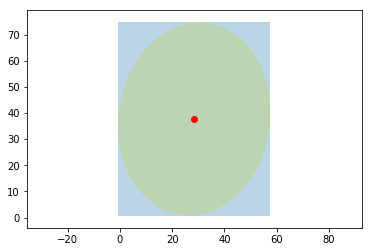

enter to continue

[79.589662, 49.835046, -1.457361, 112.5143, 92.364284]
{'a': 49.835046,
 'b': 79.589662,
 'center': (112.5143, 92.364284),
 'theta': -1.457361,
 'x_final': [62.18664922633601,
             162.841950773664,
             117.97727574019073,
             107.05132425980928],
 'y_final': [83.75868203614127,
             100.96988596385873,
             171.64337124689303,
             13.085196753106956]}


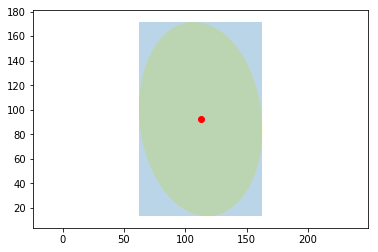

enter to continue



In [79]:
# for k in keys:
for k in ['2002/08/31/big/img_17676\n']:
    print("current key:", k)
    for entry in all_data[k]:
        entry = [float(x) for x in entry[:5]]
        print(entry)
        convert_annotation(entry, True)
        bullshit = input("enter to continue\n")
        


### Convert Function

In [5]:
import math
# math.tan(math.pi/4)

def cal_x_y_list(a, b, tan_theta, cot_theta):
    x_list, y_list = [], []

    x = abs(a**2 * tan_theta) / math.sqrt(a**2 * tan_theta**2 + b**2)
    x_list.append(x)
    x_list.append((-1) * x)
    y_list.append(b**2/(a**2 * tan_theta) * x_list[0] * (-1))
    y_list.append(b**2/(a**2 * tan_theta) * x_list[1] * (-1))

    x = abs(a**2 * cot_theta) / math.sqrt(a**2 * cot_theta**2 + b**2)
    x_list.append(x)
    x_list.append((-1) * x)
    y_list.append(b**2/(a**2 * cot_theta) * x_list[2])
    y_list.append(b**2/(a**2 * cot_theta) * x_list[3])
    
    return x_list, y_list

def rotate_x_y(x_list, y_list, theta):
    if theta > 0:
        r_angle = math.pi/2 - theta  # rotate rangle
    else:
        r_angle = (-1) * math.pi/2 + theta # seems wrong but work well?
#         r_angle = (-1) * math.pi/2 - theta

    x_final, y_final = [], []
    for x,y in zip(x_list, y_list):
        x_prime = x * math.cos(r_angle) + y * math.sin(r_angle)
        y_prime = y * math.cos(r_angle) - x * math.sin(r_angle)
        x_final.append(x_prime)
        y_final.append(y_prime)
    return x_final, y_final

def convert_annotation(input_list, plot=False):
    """
        Do the math here
        
        Sample input list:
            ['123.583300', '85.549500', '1.265839', '269.693400', '161.781200', '1', '']

        Here, each face is denoted by:
            <major_axis_radius   minor_axis_radius   angle   center_x   center_y 1>.
    """
    inputs = [float(x) for x in input_list[:5]]
    b, a = inputs[0], inputs[1]
    theta = inputs[2] # can be +ve/-ve, < pi/2
    
    if abs(theta-0)<0.01 or abs(theta-math.pi/2)<0.01:
        # x, y, short, long
        return inputs[4]-b, inputs[3]-a, a*2, b*2
    
    tan_theta = math.tan(theta) if theta <0 else (-1) * math.tan(theta)
    cot_theta = math.tan(math.pi/2 - theta) if theta <0 else (-1) * math.tan(math.pi/2 - theta)
    
    x_list, y_list = cal_x_y_list(a, b, tan_theta, cot_theta)
    x_final, y_final = rotate_x_y(x_list, y_list, theta)
    x_final = [x + inputs[3] for x in x_final]
    y_final = [y + inputs[4] for y in y_final]
    
    data = {
        "x_final":x_final,
        "y_final":y_final,
        'a' :a,
        'b' : b,
        'theta': theta,
        'center':(inputs[3], inputs[4])
    }
    pprint(data)
    if plot:
        visualize(data)
    
    (left, top), width, height = prepare_rectangle(x_final, y_final)
    return top, left, width, height

In [67]:
# import random
# random.seed(0)
# random.randint(0,1000)

['134.758000', '87.405711', '-1.094724', '371.435000', '156.424600', '1', '']
['137.503599', '88.882300', '1.569764', '232.454000', '146.552440', '1', '']


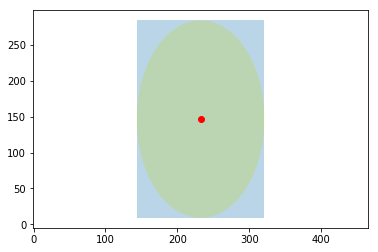

In [317]:
line = all_data['2002/09/01/big/img_16378\n'][2]
line = all_data['2002/08/10/big/img_598\n'][0]
line = all_data['2002/08/10/big/img_598\n'][1]
# line = all_data['2002/08/10/big/img_598\n'][2]

print(all_data['2002/08/10/big/img_598\n'][2])

print(line)
# <major_axis_radius   minor_axis_radius   angle   center_x   center_y 1>.

convert_annotation(line, True)

In [229]:
'2002/09/01/big/img_16378\n': ['-1.064759', '1.565185', '0.706551'],
    
# -ve: right, +ve: left
# i.e. right, left, left

In [242]:
all_angles

{'2002/08/11/big/img_591\n': ['1.265839'],
 '2002/08/26/big/img_265\n': ['-1.476417', '1.471906', '1.370217'],
 '2002/07/19/big/img_423\n': ['1.550861'],
 '2002/08/24/big/img_490\n': ['-1.384924'],
 '2002/08/31/big/img_17676\n': ['1.433107', '-1.457361'],
 '2002/07/31/big/img_228\n': ['-1.540952', '1.530747'],
 '2002/07/24/big/img_402\n': ['1.518290', '-1.466077', '1.520238'],
 '2002/08/04/big/img_769\n': ['-1.283213', '-1.530065'],
 '2002/07/19/big/img_581\n': ['1.570796'],
 '2002/08/13/big/img_723\n': ['1.495311'],
 '2002/08/12/big/img_821\n': ['-1.518437'],
 '2003/01/17/big/img_610\n': ['1.420597',
  '1.263273',
  '1.563415',
  '1.497914',
  '1.449055',
  '-1.488470'],
 '2002/08/13/big/img_1116\n': ['-1.489578', '-1.517358'],
 '2002/08/28/big/img_19238\n': ['1.405678', '-1.423536'],
 '2002/08/21/big/img_660\n': ['1.553853'],
 '2002/08/14/big/img_607\n': ['-1.538413'],
 '2002/08/05/big/img_3708\n': ['1.191737', '1.286451'],
 '2002/08/19/big/img_511\n': ['-1.548706', '1.296588'],
 '20

### Visualize the Ellipse & Rectangle?

In [7]:
from matplotlib.patches import Ellipse, Circle, Rectangle
import matplotlib.pyplot as plt

def prepare_rectangle(x_final, y_final):
    """prepare for visualziation of Rectangel"""
    x_s, x_b = min(x_final), max(x_final)
    y_s, y_b = min(y_final), max(y_final)
    width = x_b - x_s
    height = y_b - y_s
    
    return (x_s, y_s), width, height

def prepare_ellipse(a, b, theta, center):
#     plot_angle = 180 / math.pi * ((-1)*theta + math.pi/2) if theta < 0 else 180 / math.pi * (theta - math.pi/2) 
    plot_angle = 180 / math.pi * (theta + math.pi/2) if theta < 0 else 180 / math.pi * (theta - math.pi/2) 
    return center, a*2, b*2, plot_angle

def visualize(kwarges):
    x_final = kwarges['x_final']
    y_final = kwarges['y_final']
    a, b, theta = kwarges['a'], kwarges['b'], kwarges['theta']

    ra,rb,rc = prepare_rectangle(x_final, y_final)
    d,e,f,g = prepare_ellipse(a,b,theta, kwarges['center'])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    rect1 = Rectangle(ra,rb,rc, alpha=0.3)
    ell1 = Ellipse(xy = d, width = e, height = f, angle = g, facecolor= 'yellow', alpha=0.3)
    ax.add_patch(ell1)
    ax.add_patch(rect1)

    ax.plot(kwarges['center'][0], kwarges['center'][1], 'ro')

#     plt.axis('scaled')
    plt.axis('equal')   #changes limits of x or y axis so that equal increments of x and y have the same length
    plt.show()
    
# visualize(kwarges = data)

### Analysis, how is the angle calculated?

In [82]:
# find the key with largest abs angle value
max_v, max_key = 0,""
min_v, min_key = 0,""

for k,v in all_angles.items():
#     print(k, v)
    for item in v:
        if item > max_v:
            max_v = item
            max_key = k
        if item < min_v:
            min_v = item
            min_key = k

print("Max v, max key:", max_v, max_key)
print("Min v, min key:", min_v, min_key)

Max v, max key: 1.570796 2002/07/19/big/img_581

Min v, min key: -1.570796 2002/07/21/big/img_202



In [86]:
sorted_angles = sorted([x for l in all_angles.values() for x in l])

print(sorted_angles[0], sorted_angles[-1])

# sorted_angles[-1]*2 = 3.14 = pi 

-1.570796 1.570796


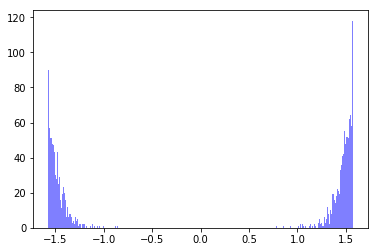

In [66]:
import matplotlib.pyplot as plt

num_bins = 1000
n, bins, patches = plt.hist(sorted_angles, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [120]:
for x, y in zip(x_list, y_list):
    print(x, y)

0.8660254037844386 0.5000000000000001
-0.8660254037844386 -0.5000000000000001
0.5 -0.8660254037844385
-0.5 0.8660254037844385


In [121]:
for x, y in zip(x_final, y_final):
    print(x, y)

1.0 1.1102230246251565e-16
-1.0 -1.1102230246251565e-16
5.551115123125783e-17 -0.9999999999999998
-5.551115123125783e-17 0.9999999999999998


In [133]:
print(prepare_rectangle(x_final, y_final))

((-1.0, -0.9999999999999998), 2.0, 1.9999999999999996)


In [135]:
print(prepare_ellipse(a,b,theta))

((0, 0), 2, 2, 30.000000000000004)


In [164]:
# Manual test case
b, a = 1,1
theta = math.pi/3 # can be +ve/-ve, betw
tan_theta = math.tan(theta)
cot_theta = math.tan(math.pi/2 - theta)


In [ ]:
x_final, y_final = rotate_x_y(x_list, y_list, theta)

In [166]:
data = {
    "x_final":x_final,
    "y_final":y_final,
    'a' :a,
    'b' : b,
    'theta': theta
}
print(data)

{'x_final': [1.0, -1.0, 5.551115123125783e-17, -5.551115123125783e-17], 'y_final': [1.1102230246251565e-16, -1.1102230246251565e-16, -0.9999999999999998, 0.9999999999999998], 'a': 1, 'b': 1, 'theta': 1.0471975511965976}


In [282]:
theta = -1.0
plot_angle = 180 / math.pi * (theta + math.pi/2) if theta < 0 else 180 / math.pi * (theta - math.pi/2) 
print(plot_angle)

32.70422048691768
